In [1]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


2023-04-28 13:27:21.371205: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-28 13:27:21.412078: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-28 13:27:21.433190: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-28 13:27:21.433321: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

In [2]:
# import data processing and visualisation libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# import image processing libraries
import cv2
import skimage
from skimage.transform import resize
from sklearn.model_selection import train_test_split

# import tensorflow and keras
import tensorflow as tf
from tensorflow import keras
import os

print("Packages imported...")

Packages imported...


In [3]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [3]:
from IPython.lib.display import join
batch_size = 64
SIZE = 96
target_dims = (SIZE, SIZE, 3)
num_classes = 29

train_len = 0
train_dir = r"../Vaishnavi_Munghate_2023/asl_alphabet/asl_alphabet_train/asl_alphabet_train"

total = 0
for folder in os.listdir(train_dir):
    for img in os.listdir(train_dir + "/" + folder):
        train_len += 1
train_len

len = 26
S = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
map = {}

for j in range(len):
  map[S[j:j+1]] = join

t_lower = 50
t_upper = 150

def get_data(folder):
    x = []
    y = []
    cnt, label = 0, 0
    for folderName in sorted(os.listdir(folder)):
        s = str(folderName)
        for j in range(len):
          if S[j] == s:
            label = j
        
        print(label, folderName)

        for image_filename in os.listdir(folder + '/' + folderName):
            image_path = folder + '/' + folderName + '/' + image_filename
            img_file = cv2.imdecode(np.fromfile(image_path, dtype=np.uint8), cv2.IMREAD_UNCHANGED)
            if img_file is not None:
                img_file = cv2.resize(img_file, (SIZE, SIZE))
                img_file = cv2.cvtColor(img_file, cv2.COLOR_BGR2GRAY)
                # img_file = skimage.transform.resize(img_file, (imageSize, imageSize, 3))
                # img_arr = np.asarray(img_file).reshape((-1, imageSize, imageSize, 3))
                # edge = cv2.Canny(img_file, t_lower, t_upper)
                x.append(img_file)
                y.append(label)
                cnt += 1

    return x,y

X, Y = get_data(train_dir)

print("Images successfully imported...")

0 A
1 B
2 C
3 D
4 E
5 F
6 G
7 H
8 I
9 J
10 K
11 L
12 M
13 N
14 O
15 P
16 Q
17 R
18 S
19 T
20 U
21 V
22 W
23 X
24 Y
25 Z
25 del
25 nothing
25 space
Images successfully imported...


In [4]:
X = np.array(X)
Y = np.array(Y)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, stratify = Y)


print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)




(78300, 96, 96)
(8700, 96, 96)
(78300,)
(8700,)


In [5]:
print("The shape of X_train is : ", x_train.shape)
print("The shape of y_train is : ", y_train.shape)

The shape of X_train is :  (78300, 96, 96)
The shape of y_train is :  (78300,)


In [6]:
print("The shape of one image is : ", x_train[0].shape)

The shape of one image is :  (96, 96)


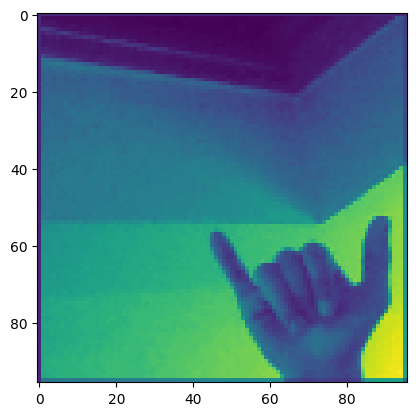

In [7]:
plt.imshow(x_train[3])
plt.show()

In [ ]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.3,random_state=42,stratify=Y_data)

In [8]:
from tensorflow.keras.utils import to_categorical
NUM_CLASSES = 29

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [9]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(78300, 96, 96)
(78300, 29)
(8700, 96, 96)
(8700, 29)


In [10]:
#MODEL

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten, Dropout
print("Packages imported...")

Packages imported...


In [21]:

model = Sequential()

# Convolutional Layer 1
model.add(Conv2D(64, kernel_size = 4, padding = 'same', input_shape = (SIZE, SIZE, 1)))
model.add(Activation('relu'))

# Convolutional Layer 2
model.add(Conv2D(64, kernel_size = 4, padding = 'same'))
model.add(Activation('relu'))


#Max-pooling layer
model.add(MaxPooling2D((2, 2)))

#Dropout layer
model.add(Dropout(0.5))

# Convolutional Layer 3
model.add(Conv2D(128 , kernel_size = 5, padding = 'same'))
model.add(Activation('relu'))

# Convolutional Layer 4
# model.add(Conv2D(128 , kernel_size = 5, padding = 'same'))
# model.add(Activation('relu'))

#Max-pooling layer
model.add(MaxPooling2D(pool_size = (2, 2)))

#Dropout layer
model.add(Dropout(0.5))

# Convolutional Layer 5
# model.add(Conv2D(256 , kernel_size = 5, padding = 'same'))
# model.add(Activation('relu'))

#Dropout layer
# model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(NUM_CLASSES, activation='softmax'))

In [11]:
#FINE TUNING
# !!pip install keras-tuner --upgrade
from kerastuner.tuners import RandomSearch
from tensorflow.keras import layers

def build_model(hp):
    model = Sequential()
    
    # Convolutional Layer 1
    model.add(Conv2D(64, kernel_size = 4, padding = 'same', input_shape = (SIZE, SIZE, 1)))
    model.add(Activation('relu'))

    # Convolutional Layer 2
    model.add(Conv2D(64, kernel_size = 4, padding = 'same'))
    model.add(Activation('relu'))


    #Max-pooling layer
    model.add(MaxPooling2D((2, 2)))

    #Dropout layer
    model.add(Dropout(0.5))

    # Convolutional Layer 3
    model.add(Conv2D(64 , kernel_size = 5, padding = 'same'))
    model.add(Activation('relu'))

#     Convolutional Layer 4
#     model.add(Conv2D(128 , kernel_size = 5, padding = 'same'))
#     model.add(Activation('relu'))

    #Max-pooling layer
    model.add(MaxPooling2D((2, 2)))

    #Dropout layer
    model.add(Dropout(0.5))

#     Convolutional Layer 5
#     model.add(Conv2D(256 , kernel_size = 5, padding = 'same'))
#     model.add(Activation('relu'))

    #Dropout layer
    # model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(NUM_CLASSES, activation='softmax'))

    model.compile(optimizer = keras.optimizers.Adam (hp.Choice('learning_rate', values = [0.0001, 0.001, 0.01, 0.1])), loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

/tmp/ipykernel_138963/2702320628.py:3: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [13]:
tuner = RandomSearch(build_model, objective = 'val_accuracy', max_trials = 5, executions_per_trial = 3, directory='diiir')

2023-04-27 23:42:24.507505: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-27 23:42:24.507794: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-27 23:42:24.507980: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-27 23:42:24.508506: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-27 23:42:24.508705: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from S

In [14]:
tuner.search_space_summary()

Search space summary
Default search space size: 1
learning_rate (Choice)
{'default': 0.0001, 'conditions': [], 'values': [0.0001, 0.001, 0.01, 0.1], 'ordered': True}


In [15]:
tuner.search(x_train, y_train, epochs = 12, validation_data = (x_test, y_test))

Trial 2 Complete [00h 00m 01s]

Best val_accuracy So Far: None
Total elapsed time: 00h 00m 02s

Search: Running Trial #3

Value             |Best Value So Far |Hyperparameter
0.0001            |0.1               |learning_rate

Epoch 1/12


2023-04-27 23:42:32.693340: E tensorflow/stream_executor/cuda/cuda_dnn.cc:373] Could not create cudnn handle: CUDNN_STATUS_INTERNAL_ERROR
2023-04-27 23:42:32.693391: W tensorflow/core/framework/op_kernel.cc:1745] OP_REQUIRES failed at conv_ops.cc:1120 : UNIMPLEMENTED: DNN library is not found.
Traceback (most recent call last):
  File "/home/sukanya/.local/lib/python3.8/site-packages/keras_tuner/engine/base_tuner.py", line 270, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "/home/sukanya/.local/lib/python3.8/site-packages/keras_tuner/engine/base_tuner.py", line 235, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
  File "/home/sukanya/.local/lib/python3.8/site-packages/keras_tuner/engine/tuner.py", line 287, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
  File "/home/sukanya/.local/lib/python3.8/site-packages/keras_tuner/engine/tuner.py", line 214, in _buil

RuntimeError: Number of consecutive failures excceeded the limit of 3.
Traceback (most recent call last):
  File "/home/sukanya/.local/lib/python3.8/site-packages/keras_tuner/engine/base_tuner.py", line 270, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "/home/sukanya/.local/lib/python3.8/site-packages/keras_tuner/engine/base_tuner.py", line 235, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
  File "/home/sukanya/.local/lib/python3.8/site-packages/keras_tuner/engine/tuner.py", line 287, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
  File "/home/sukanya/.local/lib/python3.8/site-packages/keras_tuner/engine/tuner.py", line 214, in _build_and_fit_model
    results = self.hypermodel.fit(hp, model, *args, **kwargs)
  File "/home/sukanya/.local/lib/python3.8/site-packages/keras_tuner/engine/hypermodel.py", line 144, in fit
    return model.fit(*args, **kwargs)
  File "/home/sukanya/.local/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/sukanya/.local/lib/python3.8/site-packages/tensorflow/python/eager/execute.py", line 54, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.UnimplementedError: Graph execution error:

Detected at node 'sequential/conv2d/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.8/runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.8/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/home/sukanya/.local/lib/python3.8/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/home/sukanya/.local/lib/python3.8/site-packages/traitlets/config/application.py", line 1041, in launch_instance
      app.start()
    File "/home/sukanya/.local/lib/python3.8/site-packages/ipykernel/kernelapp.py", line 724, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.8/dist-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.8/asyncio/base_events.py", line 570, in run_forever
      self._run_once()
    File "/usr/lib/python3.8/asyncio/base_events.py", line 1859, in _run_once
      handle._run()
    File "/usr/lib/python3.8/asyncio/events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "/home/sukanya/.local/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 512, in dispatch_queue
      await self.process_one()
    File "/home/sukanya/.local/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 501, in process_one
      await dispatch(*args)
    File "/home/sukanya/.local/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 408, in dispatch_shell
      await result
    File "/home/sukanya/.local/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 731, in execute_request
      reply_content = await reply_content
    File "/home/sukanya/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py", line 417, in do_execute
      res = shell.run_cell(
    File "/home/sukanya/.local/lib/python3.8/site-packages/ipykernel/zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/home/sukanya/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2945, in run_cell
      result = self._run_cell(
    File "/home/sukanya/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3000, in _run_cell
      return runner(coro)
    File "/home/sukanya/.local/lib/python3.8/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/home/sukanya/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3203, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/sukanya/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3382, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/home/sukanya/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3442, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_138963/3896895192.py", line 1, in <module>
      tuner.search(x_train, y_train, epochs = 12, validation_data = (x_test, y_test))
    File "/home/sukanya/.local/lib/python3.8/site-packages/keras_tuner/engine/base_tuner.py", line 230, in search
      self._try_run_and_update_trial(trial, *fit_args, **fit_kwargs)
    File "/home/sukanya/.local/lib/python3.8/site-packages/keras_tuner/engine/base_tuner.py", line 270, in _try_run_and_update_trial
      self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
    File "/home/sukanya/.local/lib/python3.8/site-packages/keras_tuner/engine/base_tuner.py", line 235, in _run_and_update_trial
      results = self.run_trial(trial, *fit_args, **fit_kwargs)
    File "/home/sukanya/.local/lib/python3.8/site-packages/keras_tuner/engine/tuner.py", line 287, in run_trial
      obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
    File "/home/sukanya/.local/lib/python3.8/site-packages/keras_tuner/engine/tuner.py", line 214, in _build_and_fit_model
      results = self.hypermodel.fit(hp, model, *args, **kwargs)
    File "/home/sukanya/.local/lib/python3.8/site-packages/keras_tuner/engine/hypermodel.py", line 144, in fit
      return model.fit(*args, **kwargs)
    File "/home/sukanya/.local/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/home/sukanya/.local/lib/python3.8/site-packages/keras/engine/training.py", line 1384, in fit
      tmp_logs = self.train_function(iterator)
    File "/home/sukanya/.local/lib/python3.8/site-packages/keras/engine/training.py", line 1021, in train_function
      return step_function(self, iterator)
    File "/home/sukanya/.local/lib/python3.8/site-packages/keras/engine/training.py", line 1010, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/sukanya/.local/lib/python3.8/site-packages/keras/engine/training.py", line 1000, in run_step
      outputs = model.train_step(data)
    File "/home/sukanya/.local/lib/python3.8/site-packages/keras/engine/training.py", line 859, in train_step
      y_pred = self(x, training=True)
    File "/home/sukanya/.local/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/home/sukanya/.local/lib/python3.8/site-packages/keras/engine/base_layer.py", line 1096, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/sukanya/.local/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "/home/sukanya/.local/lib/python3.8/site-packages/keras/engine/sequential.py", line 374, in call
      return super(Sequential, self).call(inputs, training=training, mask=mask)
    File "/home/sukanya/.local/lib/python3.8/site-packages/keras/engine/functional.py", line 451, in call
      return self._run_internal_graph(
    File "/home/sukanya/.local/lib/python3.8/site-packages/keras/engine/functional.py", line 589, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/home/sukanya/.local/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/home/sukanya/.local/lib/python3.8/site-packages/keras/engine/base_layer.py", line 1096, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/sukanya/.local/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "/home/sukanya/.local/lib/python3.8/site-packages/keras/layers/convolutional.py", line 248, in call
      outputs = self.convolution_op(inputs, self.kernel)
    File "/home/sukanya/.local/lib/python3.8/site-packages/keras/layers/convolutional.py", line 233, in convolution_op
      return tf.nn.convolution(
Node: 'sequential/conv2d/Conv2D'
DNN library is not found.
	 [[{{node sequential/conv2d/Conv2D}}]] [Op:__inference_train_function_2888]


In [39]:
# from tensorflow.keras.callbacks import EarlyStopping
# early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [40]:
optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [41]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', mode='min', verbose=1)

history = model.fit(x_train, y_train, epochs=15, batch_size=128, validation_split = 0.2)

Epoch 1/15
439/439 [==============================] - 168s 368ms/step - loss: 5.3832 - accuracy: 0.0380 - val_loss: 3.1974 - val_accuracy: 0.0645
Epoch 2/15
439/439 [==============================] - 156s 355ms/step - loss: 2.4903 - accuracy: 0.2687 - val_loss: 1.4453 - val_accuracy: 0.6190
Epoch 3/15
439/439 [==============================] - 156s 356ms/step - loss: 1.0751 - accuracy: 0.6575 - val_loss: 0.5171 - val_accuracy: 0.8586
Epoch 4/15
439/439 [==============================] - 156s 356ms/step - loss: 0.5204 - accuracy: 0.8283 - val_loss: 0.2646 - val_accuracy: 0.9246
Epoch 5/15
439/439 [==============================] - 156s 356ms/step - loss: 0.3245 - accuracy: 0.8919 - val_loss: 0.1669 - val_accuracy: 0.9535
Epoch 6/15
439/439 [==============================] - 156s 356ms/step - loss: 0.2496 - accuracy: 0.9150 - val_loss: 0.1115 - val_accuracy: 0.9710
Epoch 7/15
439/439 [==============================] - 156s 356ms/step - loss: 0.1960 - accuracy: 0.9346 - val_loss: 0.0881 -

In [42]:
metrics = pd.DataFrame(model.history.history)
print("The model metrics are")
metrics


The model metrics are


,loss,accuracy,val_loss,val_accuracy
0,5.383204,0.038034,3.197383,0.064530
1,2.490333,0.268714,1.445333,0.619017
2,1.075063,0.657479,0.517086,0.858618
3,0.520377,0.828312,0.264628,0.924573
4,0.324532,0.891934,0.166926,0.953490
5,0.249570,0.915046,0.111477,0.971011
6,0.195971,0.934633,0.088063,0.977208
7,0.162040,0.946421,0.098084,0.973362
8,0.158040,0.948023,0.066333,0.980556
9,0.130860,0.956517,0.054073,0.984829


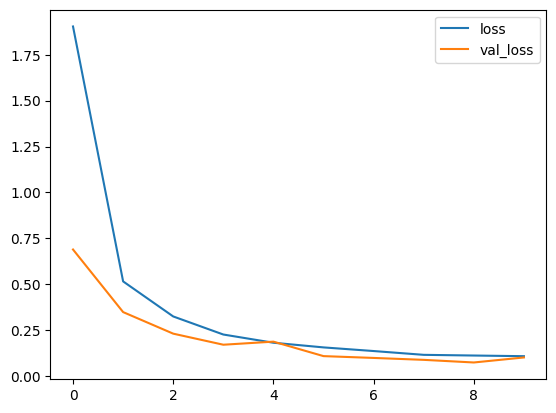

In [18]:
metrics[['loss','val_loss']].plot()
plt.show()

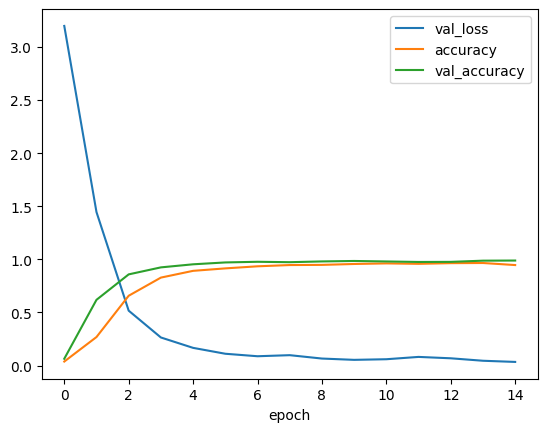

In [43]:
metrics[['val_loss', 'accuracy', 'val_accuracy']].plot()
plt.xlabel("epoch")
plt.show()

In [ ]:
model.evaluate(X_test,y_cat_test,verbose=0)

[0.012970376759767532, 0.9981608986854553]

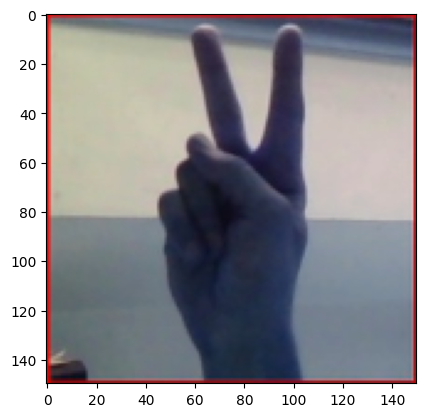

In [ ]:
plt.imshow(X_test[0])
plt.show()

In [ ]:
predictions = model.predict(X_test)
print("Predictions done...")
classes = np.argmax(predictions, axis=1)

classes

68/68 [==============================] - 1s 8ms/step
Predictions done...


array([10, 25, 22, ..., 26,  6,  0])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,predictions))

ValueError: ignored

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(confusion_matrix(y_test,predictions))
plt.show()

ValueError: ignored

<Figure size 864x864 with 0 Axes>